# Prompt 1: Visualize statistics of your data

Build useful visualizations of the statistics of your data. How many images or videos do you have? What distribution of categories of interest exist in your data? When was the data collected? Are there multiple types or modalities of data?

# Important Notes about quad names

**Standardized Format:**
S_DDdddQQ_qq_ZZ_R_YYYYMMDD_yyyymmdd

S = Sensor Type 

DDddd = SE Reference point of 1 Degree Block (Latitude = DD, Longitude = ddd)

QQ = Quad location (range 1 -64)

qq = Quadrant indicator (NE, NW, SE, SW)

ZZ = UTM Zone*

R = Resolution in meters

YYYYMMDD = Acquisition date (year, month, day)

yyyymmdd = Date NAIP JPG2000 data was created (year, month, day)

**Format for 2019 WY Imagery from GEE:**
S_DDdddQQ_qq_ZZ_R_YYYYMMDD_yyyymmdd

S = Sensor Type (m)

DDddd = SE Reference point of 1 Degree Block (Latitude = DD, Longitude = ddd)

QQ = Quad location (range 1 -64)

qq = Quadrant indicator (NE, NW, SE, SW)

ZZ = UTM Zone* (12 or 13)

R = Resolution in meters (060 = 0.60 m)

YYYYMMDD = Acquisition date (year, month, day)


**My images have an added number at the end: _XXXX = cell number from a grid of cells created over each USGS quarter quad**
(quad number range from 0 to several thousand, so the last number can have 1-4 digits)

First import useful packages

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

: 

Load COCO labels and visualize some high-level statistics of the dataset.

In [382]:
with open('/mnt/c/Users/rache/Dropbox/Doctoral Projects/CV4Ecology 2022/Final Images/final_labels_20220801.json') as f:
  metadata = json.load(f)

Read .json data (hopefully)

In [383]:
images = metadata['images']
annotations = metadata['annotations']
train_categories = set([ann['category_id'] for ann in annotations])
categories = [cat for cat in metadata['categories'] if cat['id'] in train_categories]
im_to_cat = {ann['image_id']: ann['category_id'] for ann in annotations}

In [384]:
categories

[{'id': 0, 'name': 'piosphere', 'supercategory': 'piosphere'},
 {'id': 1, 'name': 'tank', 'supercategory': 'tank'}]

In [385]:
print('High-level statistics:\n')
print('Total images: '+str(len(images)))
print('Categories: '+str(len(categories)))
print('Annotations: '+str(len(annotations)))
print('Piospheres: '+str(len([ann['id'] for ann in annotations if ann['category_id'] == 0])))
print('Water tanks: '+str(len([ann['id'] for ann in annotations if ann['category_id'] == 1])))
print('Empty images: 1033')

High-level statistics:

Total images: 1801
Categories: 2
Annotations: 1651
Piospheres: 861
Water tanks: 790
Empty images: 1033


In [8]:
#find a file ends with .png in Piosphere images
import os
x = os.listdir(r"/mnt/c/Users/rache/Dropbox/Doctoral Projects/CV4Ecology 2022/Final Images/Obsolete/Piospheres")

# Name list
namelist = []
for i in x:
    if i.endswith(".png"):
        namelist.append(i)
        
# Look at list
#namelist

In [57]:
namelist[1].split("_")

['m', '4010402', 'nw', '13', '060', '20190824', '206.png']

In [21]:
# Set up some empty lists for storing information
dateList = []
sensorList = []
resolutionList = []
quadlist = []

for i in range(0,len(namelist)):
  thisName = namelist[i]
  thisName = thisName.replace('.png','')
  splitName = thisName.split("_")
  dateList.append(splitName[5])
  sensorList.append(splitName[0])
  resolutionList.append(splitName[4])
  quadlist.append(splitName[1])

# Find number of unique dates
uniqueDates = len(np.unique(dateList))
print("Number of unique dates: " + str(uniqueDates))
print("Number of unique USGS quads: " + str(len(np.unique(quadlist))))

Number of unique dates: 32
Number of unique USGS quads: 263


In [58]:
# Get summary information of list
dateSeries = pd.Series(dateList)
ind = dateSeries.value_counts()
ind.sort_index()

20190709      6
20190710     18
20190711    121
20190712     15
20190718     55
20190719      9
20190720      6
20190722      2
20190723     54
20190725     11
20190726     11
20190728      4
20190729      1
20190731     58
20190803     23
20190806      3
20190812     32
20190813     14
20190819      3
20190821     19
20190824      9
20190825     10
20190826      3
20190827      2
20190828     46
20190829     76
20190831     85
20190901     25
20190902      1
20190913     42
20190914      3
20190926      1
dtype: int64

In [11]:
#find a file ends with .png in Nonpiosphere images
import os
x = os.listdir(r"/mnt/c/Users/rache/Dropbox/Doctoral Projects/CV4Ecology 2022/Final Images/Obsolete/Nonpiospheres")

# Name list
namelist1 = []
for i in x:
    if i.endswith(".png"):
        namelist1.append(i)
        
# Look at list
#namelist

In [17]:
namelist1[1].split("_")

['m', '4010404', 'ne', '13', '060', '20190919', '465.png']

In [20]:
# Set up some empty lists for storing information
dateList1 = []
sensorList1 = []
resolutionList1 = []
quadlist1 = []

for i in range(0,len(namelist1)):
  thisName = namelist1[i]
  thisName = thisName.replace('.png','')
  splitName = thisName.split("_")
  dateList1.append(splitName[5])
  sensorList1.append(splitName[0])
  resolutionList1.append(splitName[4])
  quadlist1.append(splitName[1])

# Find number of unique dates
uniqueDates1 = len(np.unique(dateList1))
print("Number of unique dates: " + str(uniqueDates1))
print("Number of unique USGS quads: " + str(len(np.unique(quadlist1))))

Number of unique dates: 42
Number of unique USGS quads: 801


In [59]:
# Get summary information of list
dateSeries1 = pd.Series(dateList1)
ind1 = dateSeries1.value_counts()
ind1.sort_index()

20190709    26
20190710    33
20190711    71
20190712    35
20190718    70
20190719    35
20190720    23
20190722    24
20190723    70
20190725     8
20190726     5
20190728    40
20190729    16
20190731     7
20190802    18
20190803    14
20190805     5
20190806     9
20190809     8
20190812    73
20190813    50
20190814     6
20190815    17
20190818    19
20190819    15
20190821    14
20190824     4
20190825     6
20190826    71
20190827    46
20190828    50
20190829    46
20190831    29
20190901    12
20190902     6
20190913    35
20190914     6
20190918     3
20190919     2
20190924     4
20190926     1
20191003     1
dtype: int64

<AxesSubplot:>

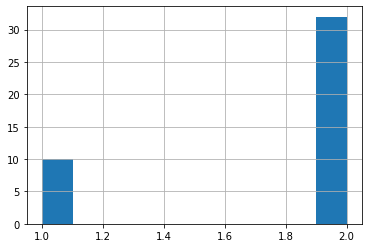

In [64]:
# Compare dates between labeled and unlabeled data--concatenate lists and count repeats
alldates = list(set(dateList)) + list(set(dateList1))

# Get summary information of complete list
alldates_series = pd.Series(alldates)
finalIndex = alldates_series.value_counts()
finalIndex.index

# 1 = nonpio only; 2 = pio + nonpio
finalIndex.hist()

In [51]:
# Merge date indices for visualization
ind_merge = pd.concat([ind,ind1], axis = 1)
ind_merge = ind_merge.rename(columns = {0:'Piosphere_images',1: 'Nonpiosphere_images'})
ind_merge.sort_index()

,Piosphere_images,Nonpiosphere_images
20190709,6.0,26
20190710,18.0,33
20190711,121.0,71
20190712,15.0,35
20190718,55.0,70
20190719,9.0,35
20190720,6.0,23
20190722,2.0,24
20190723,54.0,70
20190725,11.0,8


array([[<AxesSubplot:title={'center':'Piosphere_images'}>,
        <AxesSubplot:title={'center':'Nonpiosphere_images'}>]],
      dtype=object)

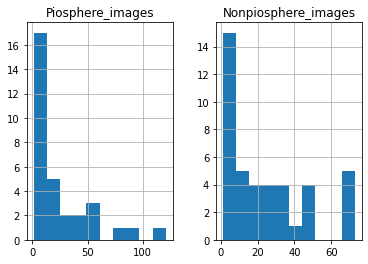

In [50]:
# Look at histogram of each
ind_merge.hist()

In [52]:
# Make histogram of number of images per USGS quad
quadSeries = pd.Series(quadlist)
pio_ind = quadSeries.value_counts()

quadSeries1 = pd.Series(quadlist1)
nonpio_ind = quadSeries1.value_counts()

In [54]:
# Combine pio and nonpio images
quad_merge = pd.concat([pio_ind,nonpio_ind], axis = 1)
quad_merge = quad_merge.rename(columns = {0:'Piosphere_images',1: 'Nonpiosphere_images'})
quad_merge.sort_index()
quad_merge

,Piosphere_images,Nonpiosphere_images
4310439,27.0,2.0
4410523,14.0,1.0
4110533,13.0,1.0
4410450,13.0,1.0
4410514,12.0,NaN
...,...,...
4210634,NaN,1.0
4210636,NaN,1.0
4210643,NaN,1.0
4210645,NaN,1.0


array([[<AxesSubplot:title={'center':'Piosphere_images'}>,
        <AxesSubplot:title={'center':'Nonpiosphere_images'}>]],
      dtype=object)

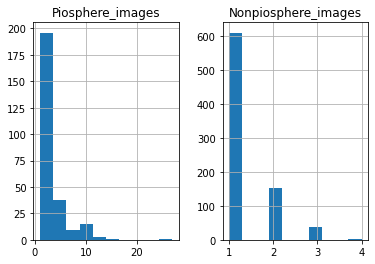

In [60]:
# Histograms of images per quad
quad_merge.hist()

1801


<AxesSubplot:>

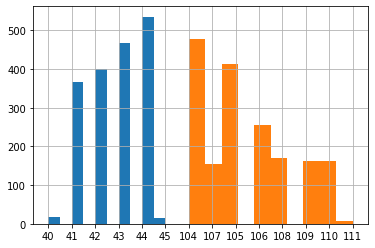

In [181]:
# Pull out the quad names
quadnames = quadlist + quadlist1
print(len(quadnames))

# Make a list of latitudes + longitudes
latitudes = []
longitudes = []
quadnumbers = []
for i in range(0,len(quadnames)):
    latitudes.append(quadnames[i][0:2])
    longitudes.append(quadnames[i][2:5])
    quadnumbers.append(quadnames[i][5:7])

pd.Series(latitudes).hist()
pd.Series(longitudes).hist()

In [190]:
quadnums = pd.Series(quadnumbers).astype(int)
quadnums.describe()

count    1801.000000
mean       31.220433
std        18.607966
min         1.000000
25%        15.000000
50%        30.000000
75%        48.000000
max        64.000000
dtype: float64

## Attempt to split data geographically

File names contain approximate lat/long information.

Note: quad numbers range from 1 to 64

**Target splits:

    * Train: ~70%
    * Test: ~15%
    * Val: ~15%

In [252]:
# First test splits:
# train: lat > 42 + lat > 41 & long < 106
# test: lat = 41 + lat = 42 & long < 106
# val: lat = 40

# make df of coords
coords = pd.DataFrame({'lat': latitudes,'lon': longitudes, 'quad': quadnums})
coords.lat = coords.lat.astype(int)
coords.lon = coords.lon.astype(int)
total_images = len(coords.lat)

# try train split
train_ind = coords.index[coords.lat.gt(42) | ((coords.lat.gt(41)) & (coords.lon.gt(105)))].tolist()
print("Train images: " + str(len(train_ind)) + " (" + str(round(len(train_ind)/1801,2)*100) + "%)")

# try test split
# 
test_ind = coords.index[(coords.lat.eq(41) & coords.quad.lt(20)) | (coords.lat.eq(42) & coords.lon.lt(106))].tolist()
print("Test images: " + str(len(test_ind)) + " (" + str(round(len(test_ind)/total_images,3)*100) + "%)")

# try val split
val_ind = coords.index[(coords.lat.eq(41) & coords.quad.gt(19)) | coords.lat.eq(40)].tolist()
print("Val images: " + str(len(val_ind)) + " (" + str(round(len(val_ind)/total_images,3)*100) + "%)")

# Verify correct number of images
print("Total images: " + str(total_images))
print("Sum of indices: " + str(len(train_ind + test_ind + val_ind)))

Train images: 1246 (69.0%)
Test images: 284 (15.8%)
Val images: 271 (15.0%)
Total images: 1801
Sum of indices: 1801


### Need to create separate .json MS COCO files for each split of the data

In [345]:
train_namesSeries = pd.Series(train_names)
train_namesSeries
for i in range(300,301):#len(imagenames)):
    if metadata['images'][i]['file_name'] in train_names:
        print(metadata['images'][i])
    else:
        print("Not here")

{'height': 256, 'width': 256, 'id': 301, 'file_name': 'm_4310439_ne_13_060_20190711_1717.png'}


In [347]:
##print(metadata['images'][1]['file_name'])
#([str(metadata['images'][i]['file_name'])])
train_names[i]


SyntaxError: invalid syntax (1705200108.py, line 4)

In [492]:
# FOR TRAINING SET
# Transform json input to python objects
images_dict = metadata['images']
ann_dict = metadata['annotations']
cat_dict = metadata['categories']

# Filter python objects with list comprehensions
images_out = []
for x in range(0,len(images_dict)):
    if str(images_dict[x]['file_name']) in train_names:
        images_out.append(images_dict[x])

# Try to grab annotations by 'image_id'
img_ids = []
for i in range(0,len(images_out)):
    img_ids.append(images_out[i]['id'])
print(len(img_ids))
    
ann_out = []
for x in range(0,len(ann_dict)):
    if ann_dict[x]['image_id'] in img_ids:
        ann_out.append(ann_dict[x])
print(len(ann_out))
    
# Transform python object back into json
images_json = json.dumps(images_out)
ann_json = json.dumps(ann_out)

# Combine into one final training json
train_dict = {'images':images_out, 'annotations':ann_out, 'categories':cat_dict}
train_json = json.dumps(train_dict)

# Save file
#with open('/mnt/c/code/pioproj/train_annotations.json','w') as train_dumped:
#    json.dump(train_json, train_dumped)



1246
1234


In [493]:
# FOR TEST SET
# Transform json input to python objects
images_dict = metadata['images']
ann_dict = metadata['annotations']
cat_dict = metadata['categories']

# Filter python objects with list comprehensions
images_out = []
for x in range(0,len(images_dict)):
    if str(images_dict[x]['file_name']) in test_names:
        images_out.append(images_dict[x])

# Try to grab annotations by 'image_id'
img_ids = []
for i in range(0,len(images_out)):
    img_ids.append(images_out[i]['id'])
print(len(img_ids))
    
ann_out = []
for x in range(0,len(ann_dict)):
    if ann_dict[x]['image_id'] in img_ids:
        ann_out.append(ann_dict[x])
print(len(ann_out))
        
# Transform python object back into json
images_json = json.dumps(images_out)
ann_json = json.dumps(ann_out)

# Combine into one final testing json
test_dict = {'images':images_out, 'annotations':ann_out, 'categories':cat_dict}
test_json = json.dumps(test_dict)

# Save file
#with open('/mnt/c/code/pioproj/test_annotations.json','w') as test_dumped:
#    json.dump(test_json, test_dumped)



284
285


In [502]:
# FOR VAL SET
# Transform json input to python objects
images_dict = metadata['images']
ann_dict = metadata['annotations']
cat_dict = metadata['categories']

# Filter python objects with list comprehensions
images_out = []
for x in range(0,len(images_dict)):
    if str(images_dict[x]['file_name']) in val_names:
        images_out.append(images_dict[x])

# Try to grab annotations by 'image_id'
img_ids = []
for i in range(0,len(images_out)):
    img_ids.append(images_out[i]['id'])
print(len(img_ids))
    
ann_out = []
for x in range(0,len(ann_dict)):
    if ann_dict[x]['image_id'] in img_ids:
        ann_out.append(ann_dict[x])
print(len(ann_out))
    
# Transform python object back into json
images_json = json.dumps(images_out)
ann_json = json.dumps(ann_out)

# Combine into one final valing json
val_dict = {'images':images_out, 'annotations':ann_out, 'categories':cat_dict}
val_json = json.dumps(val_dict)

# Save file
#with open('/mnt/c/code/pioproj/val_annotations.json','w') as val_dumped:
#    json.dump(val_json, val_dumped)



271
132


In [503]:
# Load all the json files to look at them
val_json = json.loads(val_json)
test_json = json.loads(test_json)
train_json = json.loads(train_json)

In [499]:
# Get statistics for each set
print('High-level statistics for training set:\n')
print('Total images: '+str(len(train_json['images'])))
print('Annotations: '+str(len(train_json['annotations'])))
annotations = train_json['annotations']
print('Piospheres: '+str(len([ann['id'] for ann in annotations if ann['category_id'] == 0])))
print('Water tanks: '+str(len([ann['id'] for ann in annotations if ann['category_id'] == 1])))
print('Empty images: '+str(len(train_json['images']) - len(np.unique([ann['image_id'] for ann in annotations]))))

High-level statistics for training set:

Total images: 1246
Annotations: 1234
Piospheres: 615
Water tanks: 619
Empty images: 681


In [500]:
# Get statistics for each set
print('High-level statistics for test set:\n')
print('Total images: '+str(len(test_json['images'])))
print('Annotations: '+str(len(test_json['annotations'])))
annotations = test_json['annotations']
print('Piospheres: '+str(len([ann['id'] for ann in annotations if ann['category_id'] == 0])))
print('Water tanks: '+str(len([ann['id'] for ann in annotations if ann['category_id'] == 1])))
print('Empty images: '+str(len(test_json['images']) - len(np.unique([ann['image_id'] for ann in annotations]))))

High-level statistics for test set:

Total images: 284
Annotations: 285
Piospheres: 171
Water tanks: 114
Empty images: 151


In [504]:
# Get statistics for each set
print('High-level statistics for val set:\n')
print('Total images: '+str(len(val_json['images'])))
print('Annotations: '+str(len(val_json['annotations'])))
annotations = val_json['annotations']
print('Piospheres: '+str(len([ann['id'] for ann in annotations if ann['category_id'] == 0])))
print('Water tanks: '+str(len([ann['id'] for ann in annotations if ann['category_id'] == 1])))
print('Empty images: '+str(len(val_json['images']) - len(np.unique([ann['image_id'] for ann in annotations]))))

High-level statistics for val set:

Total images: 271
Annotations: 132
Piospheres: 75
Water tanks: 57
Empty images: 201
